**Plot training data**

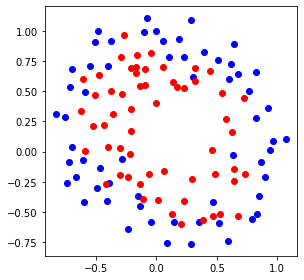

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


**Main process**

In [0]:
#initial
lr = 1
num_iter = 1000
theta = []

# map_feature creates new features based on the first input X
def map_feature(x1, x2, degree):
  temp = np.ones(len(x1)).reshape(len(x1), 1)
  for i in range(1, degree + 1):
    for j in range(i + 1):
      terms = (x1**(i-j) * x2**j).reshape(len(x1), 1)
      temp = np.hstack((temp, terms))
  return temp

# Sigmoid is an Activation function that turns the linear function to a non-linear
def sigmoid(Z):
  A =  1 / (1 + np.exp(-Z))    
  return A

# Caculate the cost function
def costFunction(h, y, lamda):
  m = len(y) 
  J = 0
  J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
  J = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + J_reg;
  return (J)

# Training model
def training(X, y, lr, num_iter, lamda):
  theta = np.zeros(X.shape[1])    
  J_history = []
  A_history = []
  for i in range(num_iter):
    z = np.dot(X, theta)
    h = sigmoid(z)
    acc = accuracy(X, y, theta)
    cost = costFunction(h, y, lamda)
    J_history.append(cost)
    A_history.append(acc)
    gradient = np.dot(X.T, (h - y)) / y.size
    theta -= lr * (gradient + lamda * theta / y.size)
  return theta, J_history, A_history

def predict_prob(X, theta):
  return sigmoid(np.dot(X, theta))

def predict(X, theta):
  return predict_prob(X, theta) >= 0.5

def accuracy(X, y, theta):
  preds = predict(X, theta)
  return (preds == y).mean() * 100

X_map = map_feature(pointX, pointY, 9)
overfitting_theta, overfitting_cost, overfitting_accuracy = training(X_map, label, lr, num_iter, 0.005)
justright_theta, justright_cost, justright_accuracy = training(X_map, label, lr, num_iter, 0.5)
underfitting_theta, underfitting_cost, underfitting_accuracy = training(X_map, label, lr, num_iter, 5)

**Plot the training error with varying regularization parameters**

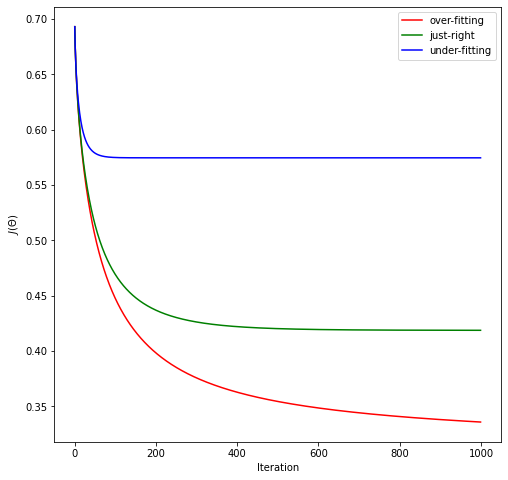

In [3]:
plt.figure(figsize=(8, 8))
plt.plot(overfitting_cost, label = "over-fitting", color = 'r')
plt.plot(justright_cost, label = "just-right", color = 'g')
plt.plot(underfitting_cost, label = "under-fitting", color = 'b')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.legend()
plt.show()

**Values of the chosen regularization parameters**